In [1]:
import numpy as np
from astropy.constants import m_p
from FD_functions.functions_3d import pizzo_maccormack, upwind, maccormack
import time
import astropy.units as u

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

# The Prototype Stream Configuration $ r = 35 R_{S}$ [Pizzo 1979, 1980]. 


In [3]:
nphi = int(360/5)
nt = int(180/2)
nr = 200
p = np.linspace(0, 2*np.pi, nphi)
t = np.linspace(-np.pi/2, np.pi/2, nt)
r = (np.linspace(35, 220, nr)*u.solRad).to(u.km)

PHI, THETA = np.meshgrid(p, np.linspace(0.05, np.pi-0.05, len(t)))

In [4]:
u_max = 580
u_min = 290

A = (u_max - u_min)/u_min

f = np.zeros((PHI.T).shape)
for ii in range(len(p)):
    for jj in range(len(t)):
        L = np.sqrt((p[ii]- np.pi)**2 + (t[jj])**2)
        f[ii, jj] = (np.sin(np.pi * L)/ (np.pi * L))**2
vr = u_min *(np.ones(PHI.T.shape) + A*f)



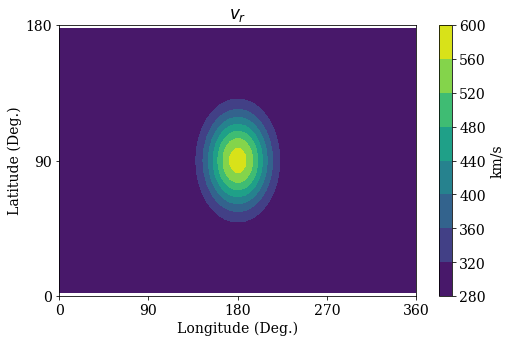

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))
pos = ax.contourf(180 / np.pi * PHI, 180 / np.pi * THETA, 
                       vr.T, cmap="viridis")
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
ax.set_title(r"$v_{r}$")

ax.set_xlabel("Longitude (Deg.)")
ax.set_ylabel("Latitude (Deg.)")
ax.set_xticks([0, 90, 180, 270, 360])
ax.set_yticks([0, 90, 180])

# Initialize Primitive Variables

In [6]:
rho_0 = (370*m_p * 1 / u.cm** 3).to(u.kg / u.km ** 3)
p_0 = (1.14 * 1e-9* u.dyne/(u.cm**2)).to(u.kg / (u.s ** 2 * u.km))

In [7]:
idx = 1

dr = r[1] - r[0]
dp = p[1] - p[0]
dt = t[1] - t[0]

U_SOL = np.zeros((5, len(p), len(t), len(r)))

U_SOL[:, :, :, 0] = np.array((vr,
                              rho_0.value * np.ones(vr.shape),
                              p_0.value * np.ones(vr.shape),
                              np.zeros(vr.shape),
                              np.zeros(vr.shape)))

0
0.16276635413367552 AU


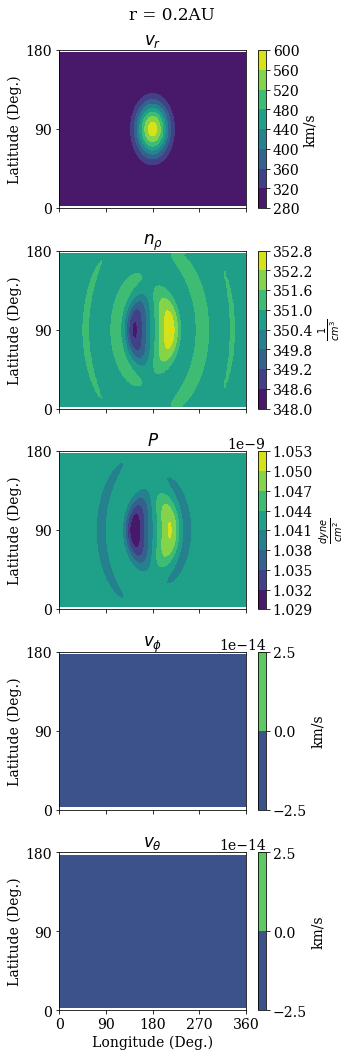

5
0.18438284768337398 AU


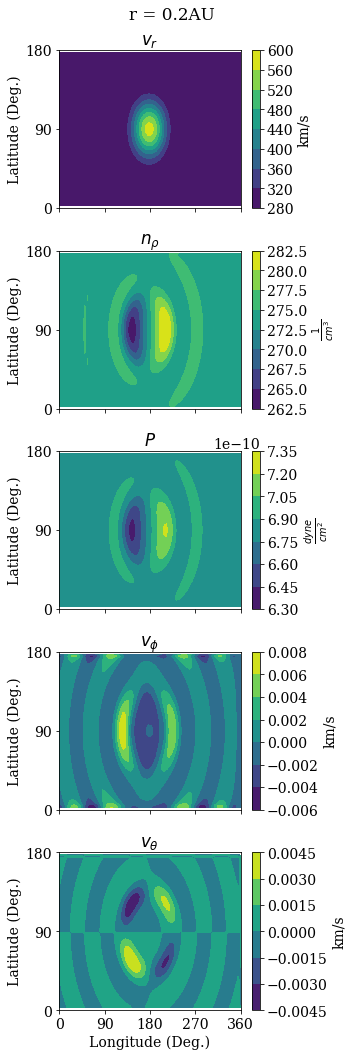

10
0.20599934123307245 AU


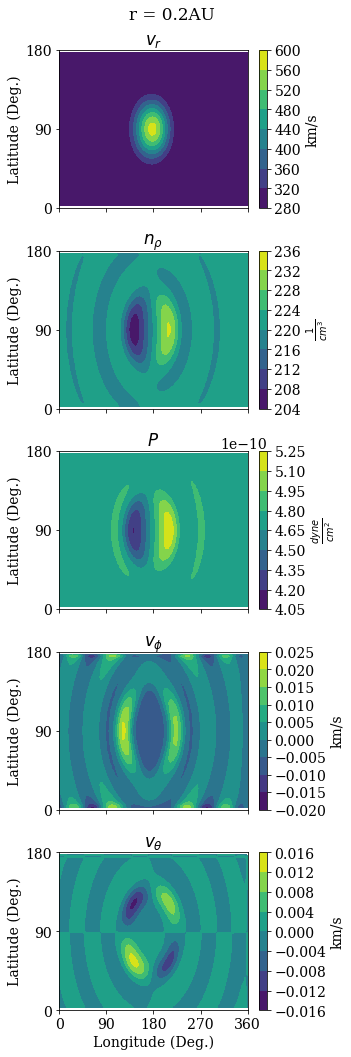

15
0.2276158347827709 AU


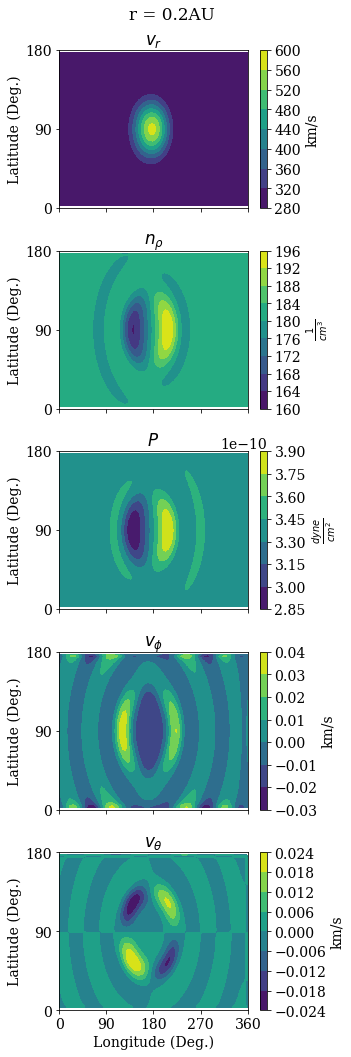

20
0.2492323283324694 AU


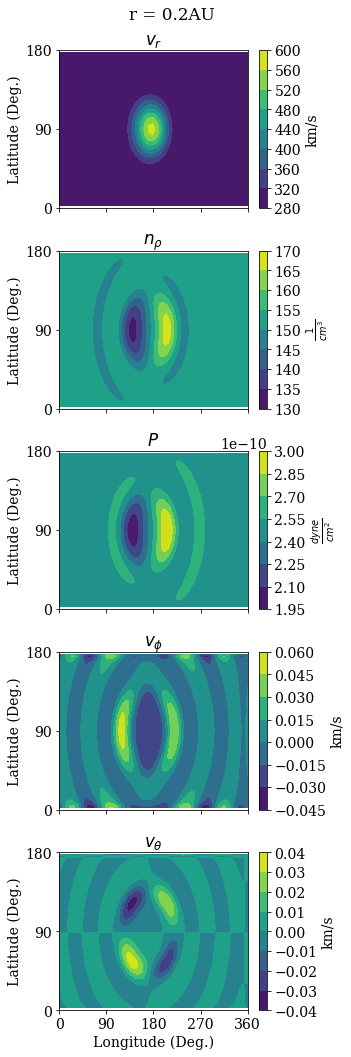

25
0.27084882188216786 AU


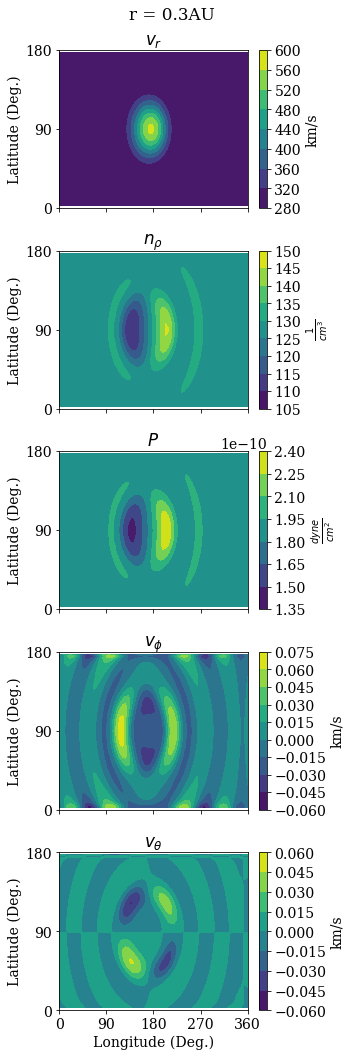

30
0.2924653154318663 AU


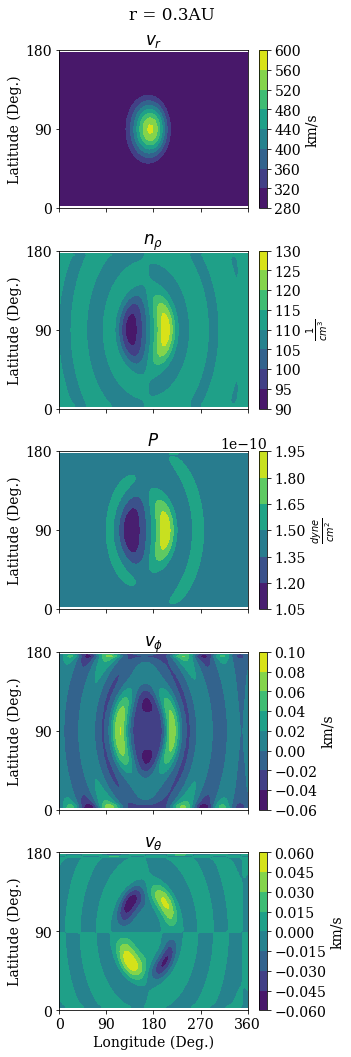

35
0.3140818089815648 AU


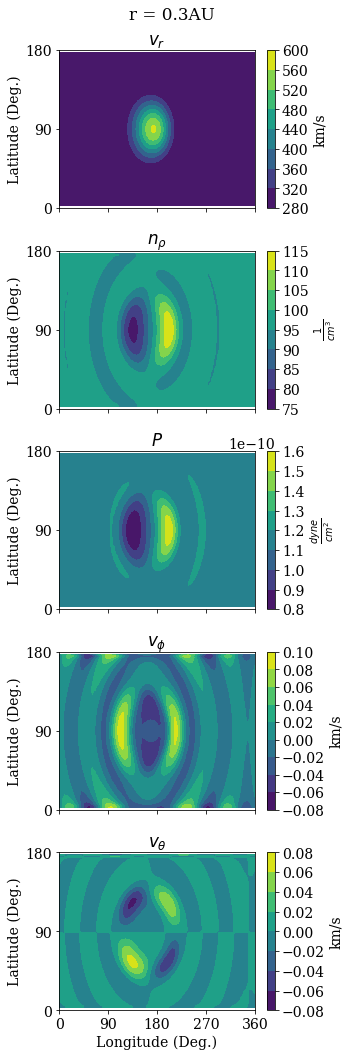

40
0.33569830253126326 AU


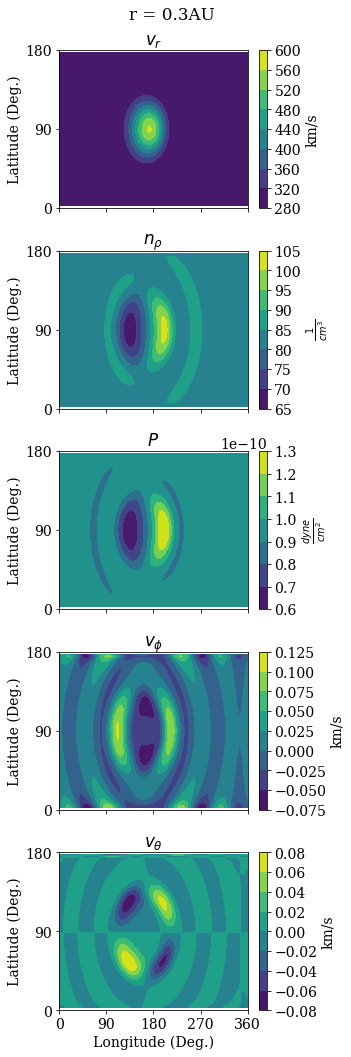

45
0.3573147960809617 AU


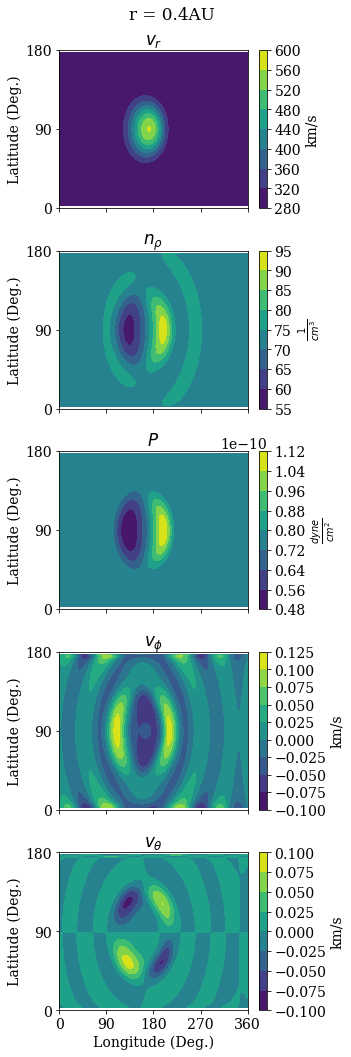

50
0.3789312896306602 AU


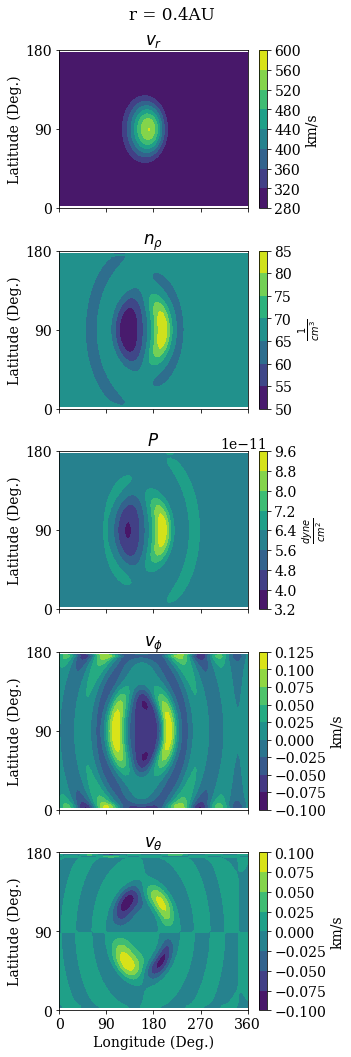

55
0.4005477831803587 AU


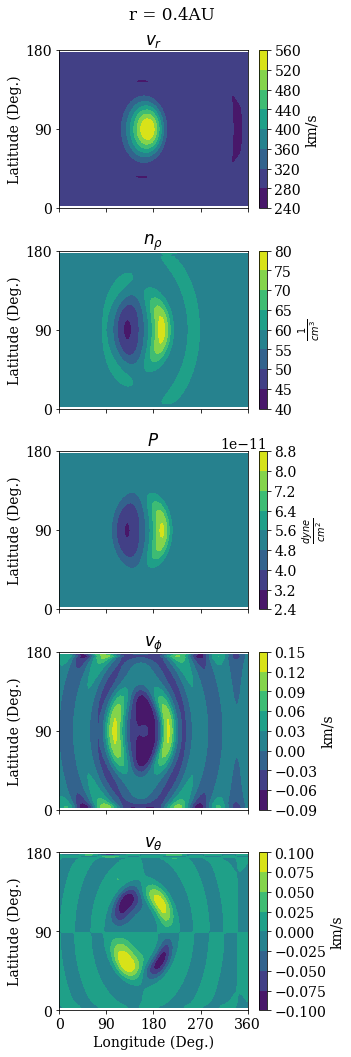

60
0.4221642767300572 AU


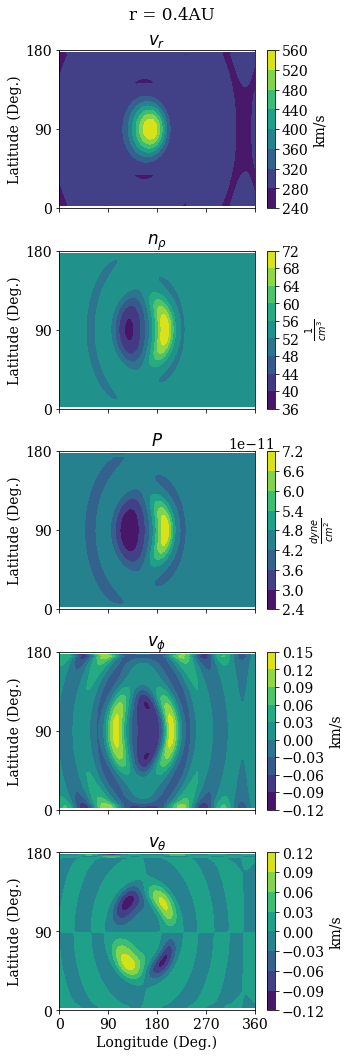

65
0.44378077027975565 AU


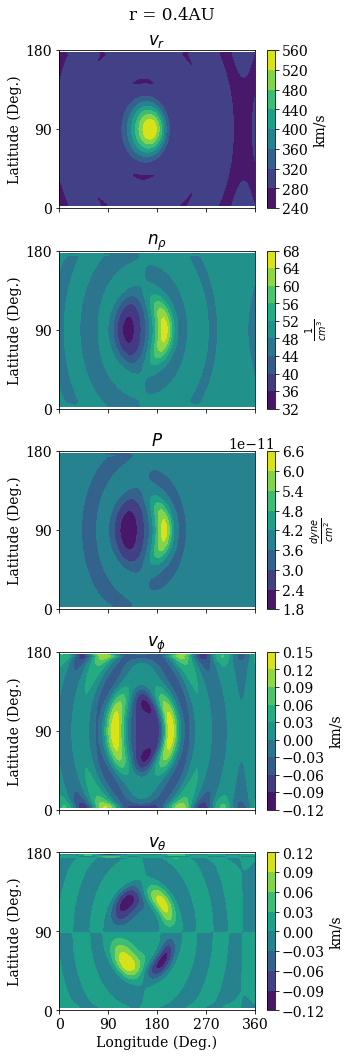

70
0.4653972638294541 AU


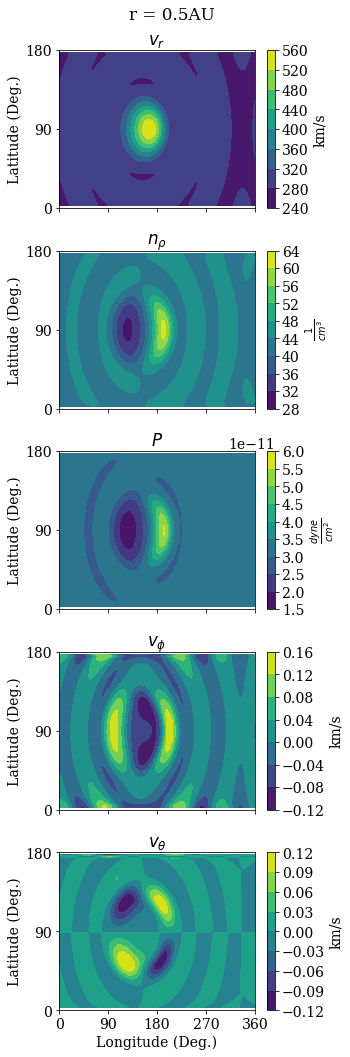

75
0.4870137573791526 AU


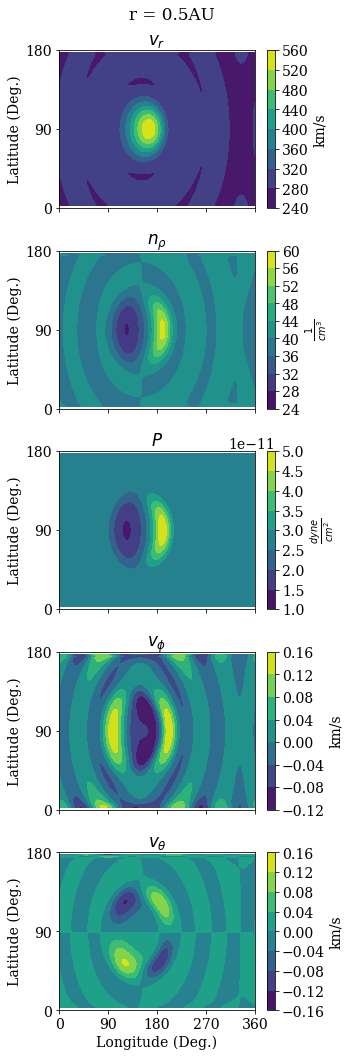

80
0.5086302509288511 AU


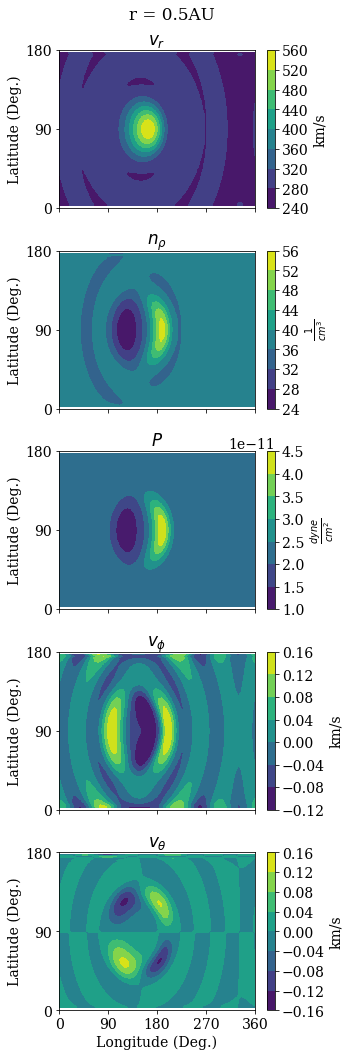

85
0.5302467444785495 AU


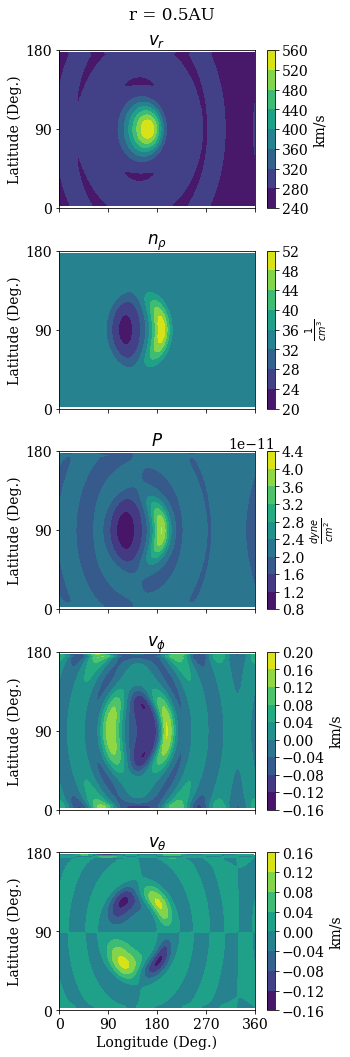

90
0.551863238028248 AU


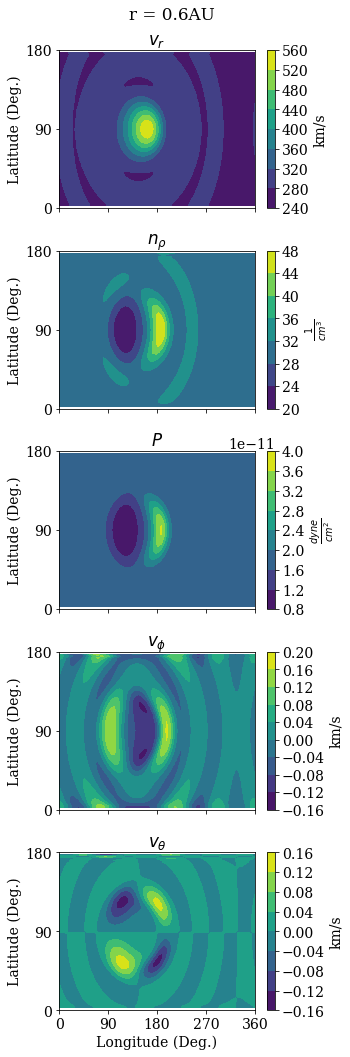

95
0.5734797315779465 AU


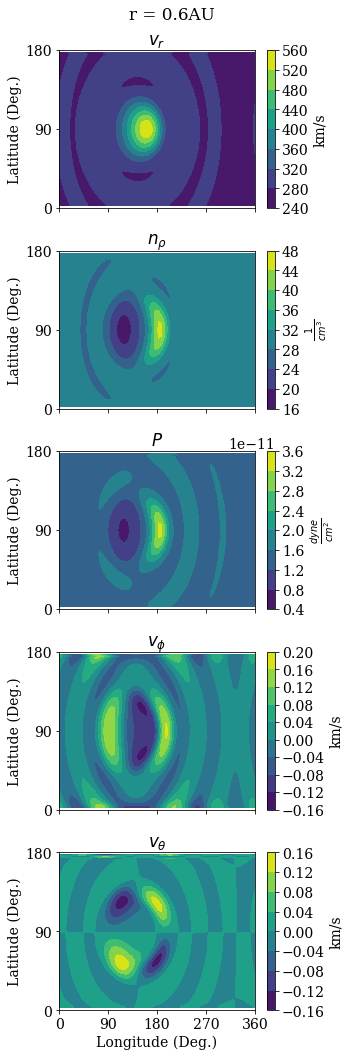

100
0.5950962251276449 AU


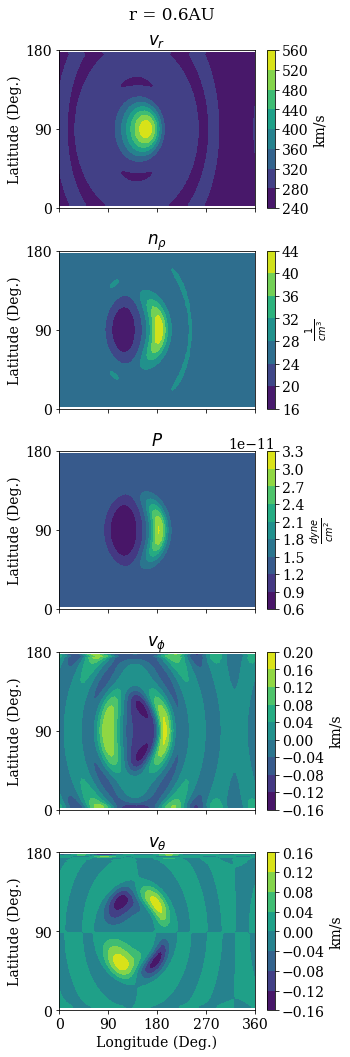

105
0.6167127186773433 AU


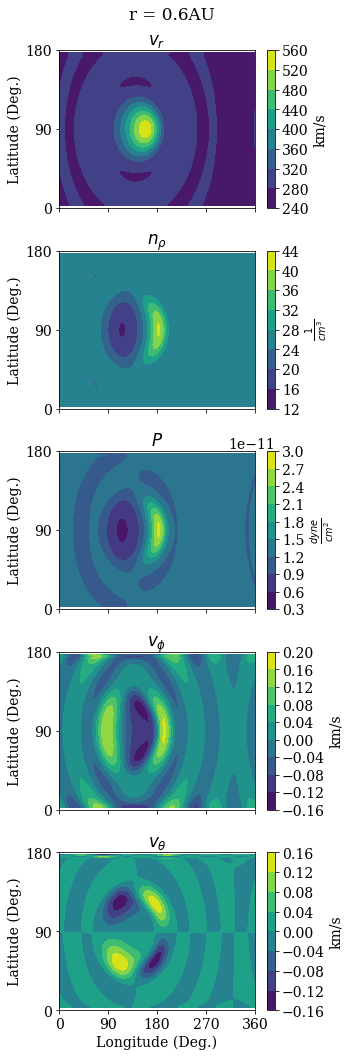

110
0.6383292122270419 AU


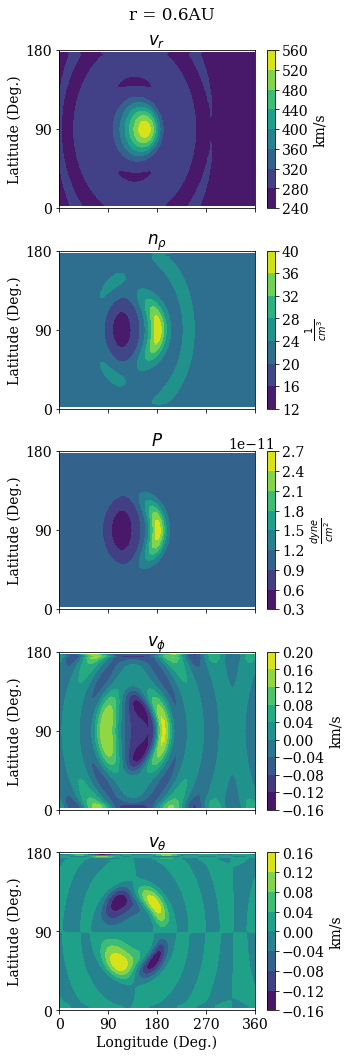

115
0.6599457057767404 AU


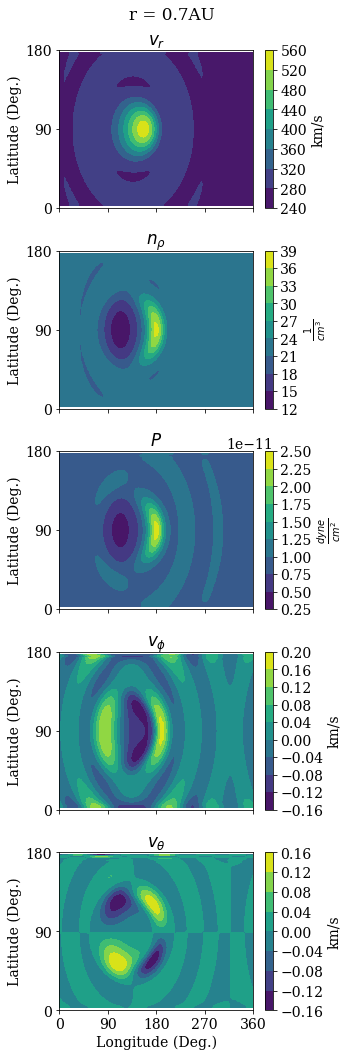

120
0.6815621993264389 AU


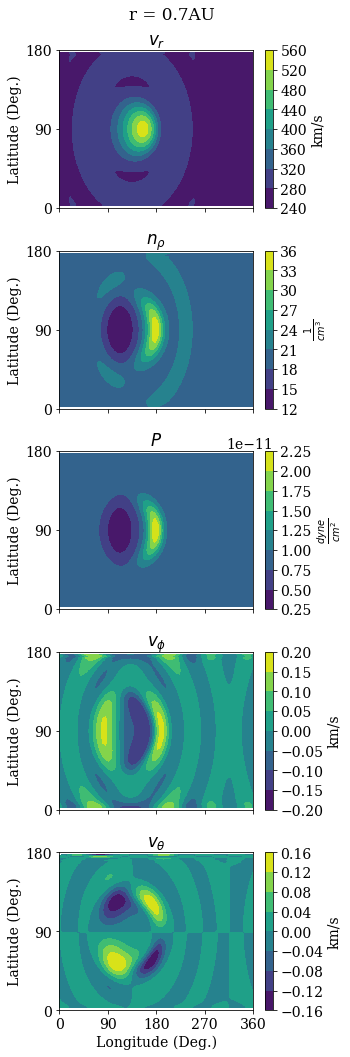

125
0.7031786928761373 AU


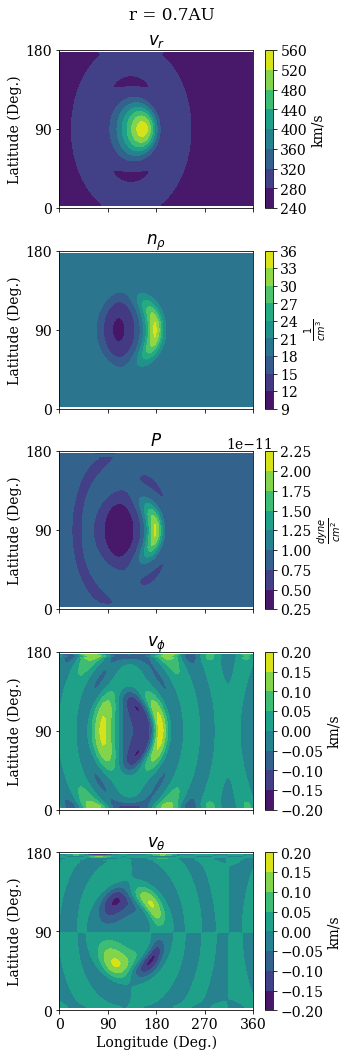

130
0.7247951864258357 AU


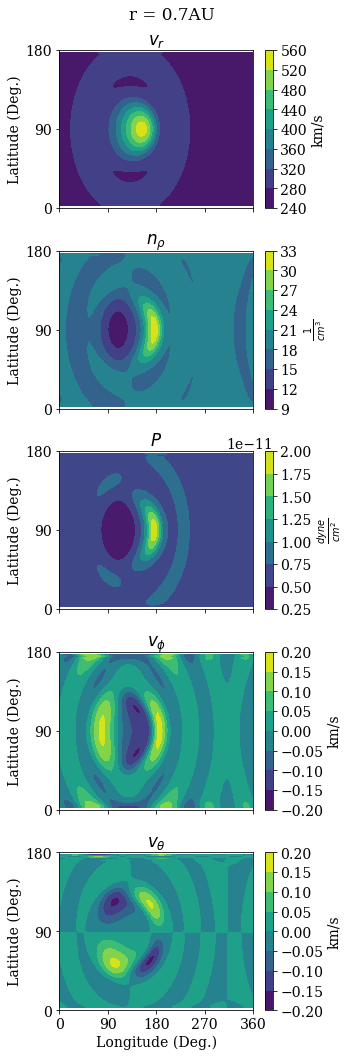

135
0.7464116799755343 AU


In [ ]:
# define mesh grid
PHI, THETA = np.meshgrid(p, np.linspace(0.05, np.pi-0.05, len(t)))

jj=0
# numerically propagte in the radial direction.
for ii in range(len(r) -1):
    U_SOL[:, :, :, ii + 1] = upwind(U=U_SOL[:, :, :, ii],
                                              dr=dr,
                                              dp=dp,
                                              dt=dt,
                                              r=r[ii],
                                              THETA=THETA.T)
    if ii % 5 == 0:
        print(ii)
        print((r[ii]).to(u.AU))
        fig, ax = plt.subplots(nrows=5, sharex=True, sharey=True, figsize=(5, 15))
        pos = ax[0].contourf(180 / np.pi * PHI, 180 / np.pi * THETA, U_SOL[0, :, :, ii + 1].T,
                               cmap="viridis")
        cbar = fig.colorbar(pos, ax=ax[0])
        cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
        ax[0].set_title(r"$v_{r}$")

        pos = ax[1].contourf(180 / np.pi * PHI, 180 / np.pi * THETA,
                               (U_SOL[1, :, :, ii + 1].T / m_p.value * 1 / u.km ** 3).to(1 / u.cm ** 3),
                               cmap="viridis")
        cbar = fig.colorbar(pos, ax=ax[1])
        cbar.ax.set_ylabel(r'$\frac{1}{cm^3}$', rotation=90, fontsize=14)
        ax[1].set_title(r"$n_{\rho}$")

        pos = ax[2].contourf(180 / np.pi * PHI, 180 / np.pi * THETA,
                               (U_SOL[2, :, :, ii + 1].T * u.kg / (u.s ** 2 * u.km)).to(u.dyne / u.cm ** 2),
                               cmap="viridis")
        cbar = fig.colorbar(pos, ax=ax[2])
        cbar.ax.set_ylabel(r'$\frac{dyne}{cm^2}$', rotation=90, fontsize=14)
        ax[2].set_title(r"$P$")

        pos = ax[3].contourf(180 / np.pi * PHI, 180 / np.pi * THETA, U_SOL[3, :, :, ii + 1].T,
                               cmap="viridis")
        cbar = fig.colorbar(pos, ax=ax[3])
        cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
        ax[3].set_title(r"$v_{\phi}$")

        pos = ax[4].contourf(180 / np.pi * PHI, 180 / np.pi * THETA, U_SOL[4, :, :, ii + 1].T, 
                               cmap="viridis")
        cbar = fig.colorbar(pos, ax=ax[4])
        cbar.ax.set_ylabel(r'km/s', rotation=90, fontsize=14)
        ax[4].set_title(r"$v_{\theta}$")
        ax[4].set_xticks([0, 90, 180, 270, 360])
        ax[4].set_yticks([0, 90, 180])
        ax[4].set_xlabel("Longitude (Deg.)")
        ax[4].set_ylabel("Latitude (Deg.)")
        ax[3].set_ylabel("Latitude (Deg.)")
        ax[2].set_ylabel("Latitude (Deg.)")
        ax[1].set_ylabel("Latitude (Deg.)")
        ax[0].set_ylabel("Latitude (Deg.)")
        #fig.suptitle("r = " + str(round(((new_r[ii]).to(u.AU)).value, 2)) + "AU")
        fig.suptitle("r = " + str(round((r[ii]).to(u.AU).value, 1)) + "AU")
        plt.tight_layout()
        plt.show()
        jj += 1
        fig.savefig("figs/artificial_bc/fig_" + str(jj) + ".png", dpi=400)
        plt.close()